In [1]:
import os
os.chdir("/home/mohsen/projects/scarches/")

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import scanpy as sc
import scarches as sca
import matplotlib
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [4]:
sc.set_figure_params(dpi=80)

In [5]:
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [6]:
sc.settings.set_figure_params(dpi=50)

In [7]:
base_path = '/home/mohsen/data/'
condition_key = "method_age"
cell_type_key = 'cell_ontology_class'
target_conditions = ["droplet - 3m", "facs - 3m"]

In [8]:
adata = sca.data.read("/home/mohsen/data/tabula_senis/tabula_senis_normalized_hvg_all_final.h5ad")
adata

AnnData object with n_obs × n_vars = 356213 × 5000 
    obs: 'FACS.selection', 'age', 'batch', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'n_counts', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation', 'method_tissue', 'method_age', 'Tech', 'size_factors'
    var: 'n_cells-0', 'n_cells-1', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'

In [9]:
source_adata = adata[~adata.obs['tissue'].isin(['Trachea'])]
source_adata = source_adata[~source_adata.obs[condition_key].isin(target_conditions)]
source_adata

View of AnnData object with n_obs × n_vars = 264287 × 5000 
    obs: 'FACS.selection', 'age', 'batch', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'n_counts', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation', 'method_tissue', 'method_age', 'Tech', 'size_factors'
    var: 'n_cells-0', 'n_cells-1', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'

In [10]:
target_adata = adata[adata.obs[condition_key].isin(target_conditions)]
target_adata

View of AnnData object with n_obs × n_vars = 90120 × 5000 
    obs: 'FACS.selection', 'age', 'batch', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'n_counts', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation', 'method_tissue', 'method_age', 'Tech', 'size_factors'
    var: 'n_cells-0', 'n_cells-1', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'

In [11]:
source_adata.obs['Tech'] = 'Tabula Senis'
target_adata.obs['Tech'] = 'Tabula Muris'

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


In [12]:
source_conditions = source_adata.obs[condition_key].unique().tolist()
source_conditions

['droplet - 24m',
 'droplet - 18m',
 'droplet - 21m',
 'droplet - 1m',
 'droplet - 30m',
 'facs - 18m',
 'facs - 24m',
 'facs - 21m']

In [13]:
network = sca.models.scArches(task="Tabula Senis",
                              x_dimension=source_adata.shape[1], 
                              z_dimension=40,
                              architecture=[128, 32],
                              gene_names=source_adata.var_names.tolist(),
                              conditions=source_conditions,
                              use_batchnorm=False,
                              lr=0.001,
                              alpha=0.0001,
                              beta=25,
                              eta=1000,
                              clip_value=10.0,
                              loss_fn='mse',
                              mmd_computation_method='5',
                              model_path="./models/scArches/",
                              dropout_rate=0.1,
                              output_activation='relu', 
                             )

W0726 15:49:52.185519 140159386232640 module_wrapper.py:139] From /home/mohsen/anaconda3/envs/mohsen/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0726 15:49:52.188284 140159386232640 module_wrapper.py:139] From /home/mohsen/anaconda3/envs/mohsen/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0726 15:49:52.189318 140159386232640 module_wrapper.py:139] From /home/mohsen/anaconda3/envs/mohsen/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0726 15:49:52.534572 140159386232640 module_wrapper.py:139] From /home/mohsen/anaconda3/envs/mohsen/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf

scArches' network has been successfully constructed!
scArches' network has been successfully compiled!


In [14]:
network.train(source_adata,
              condition_key=condition_key,
              n_epochs=500,
              batch_size=512, 
              save=True, 
              retrain=False)

W0726 15:55:21.335175 140159386232640 module_wrapper.py:139] From /home/mohsen/anaconda3/envs/mohsen/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0726 15:55:21.562976 140159386232640 module_wrapper.py:139] From /home/mohsen/anaconda3/envs/mohsen/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W0726 15:55:21.814873 140159386232640 module_wrapper.py:139] From /home/mohsen/anaconda3/envs/mohsen/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:199: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.

W0726 15:55:22.877614 140159386232640 module_wrapper.py:139] From /home/mohsen/anaconda3/envs/mohsen/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Plea

 |█████---------------| 27.2%  - loss: 91.0608 - mmd_loss: 25.1772 - reconstruction_loss: 65.8836 - val_loss: 89.5718 - val_mmd_loss: 27.3421 - val_reconstruction_loss: 62.229779
scArches has been successfully saved in ./models/scArches/unknown.


In [15]:
network.condition_encoder

{'droplet - 18m': 0,
 'droplet - 1m': 1,
 'droplet - 21m': 2,
 'droplet - 24m': 3,
 'droplet - 30m': 4,
 'facs - 18m': 5,
 'facs - 21m': 6,
 'facs - 24m': 7}

In [16]:
latent_adata = network.get_latent(sc.pp.subsample(source_adata, n_obs=50000, copy=True), 
                                  condition_key, return_z=False)
latent_adata

AnnData object with n_obs × n_vars = 50000 × 32 
    obs: 'FACS.selection', 'age', 'batch', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'n_counts', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation', 'method_tissue', 'method_age', 'Tech', 'size_factors'

In [16]:
sc.pp.neighbors(latent_adata)
sc.tl.umap(latent_adata)

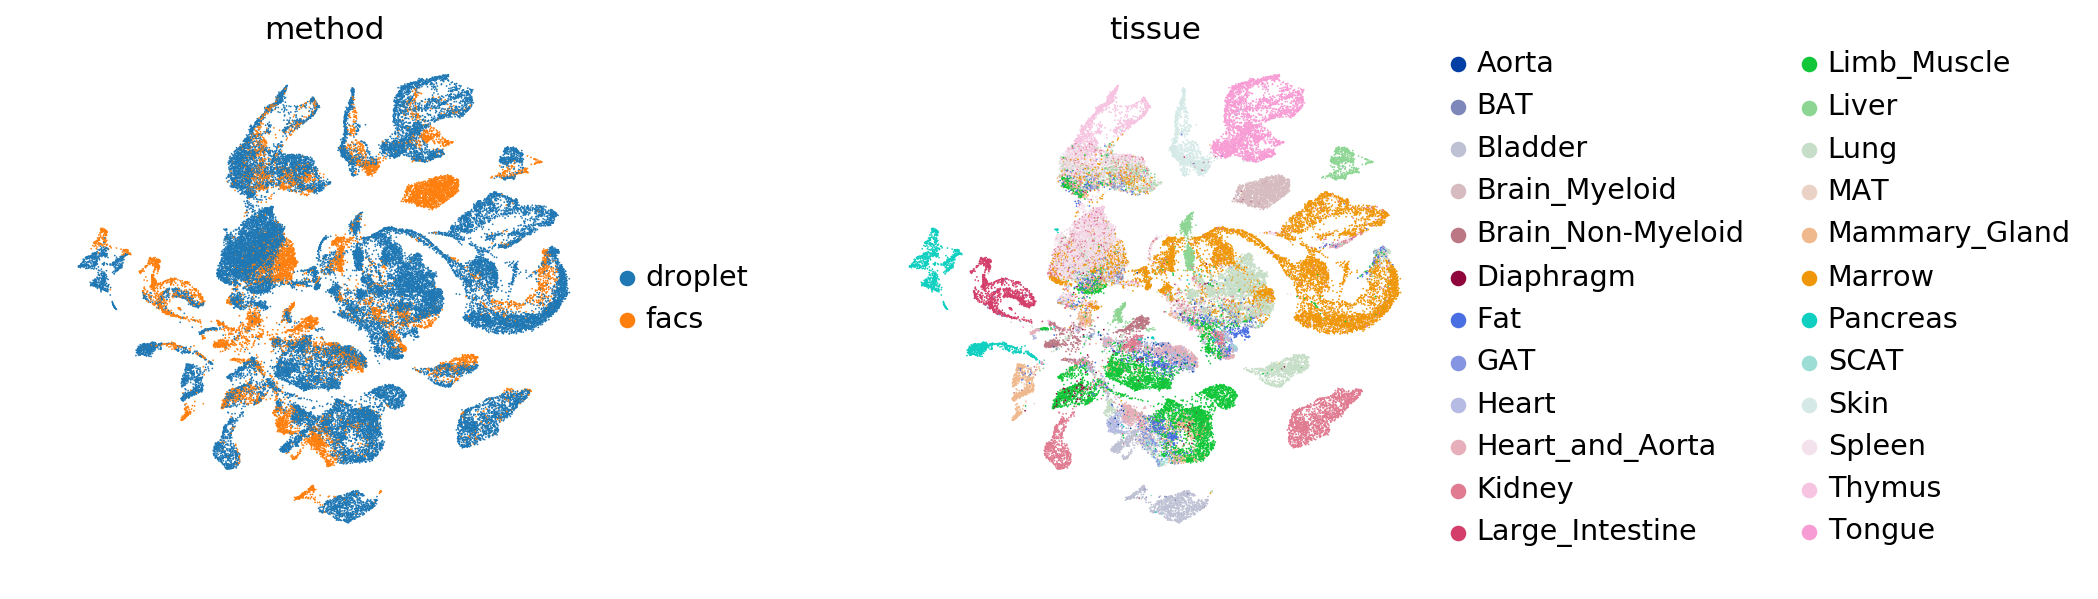

In [21]:
sc.pl.umap(latent_adata, color=['method', 'tissue'], wspace=0.4, frameon=False)

# Perfroming architecture Surgery

In [17]:
new_network = sca.operate(network, 
                          new_task_name='tabula_senis_muris',
                          new_conditions=target_conditions,
                          version='scArches',
                          remove_dropout=False,
                          new_training_kwargs={"beta": 30},
                          new_network_kwargs={"mmd_computation_method": "general"},
                         )

scArches' network has been successfully constructed!
scArches' network has been successfully compiled!
scArches' network has been successfully compiled!


In [18]:
new_network.condition_encoder

{'droplet - 18m': 0,
 'droplet - 1m': 1,
 'droplet - 21m': 2,
 'droplet - 24m': 3,
 'droplet - 30m': 4,
 'facs - 18m': 5,
 'facs - 21m': 6,
 'facs - 24m': 7,
 'droplet - 3m': 8,
 'facs - 3m': 9}

## Train with small new dataset containing out-of-sample condition

In [17]:
new_network.train(target_adata,
                  condition_key=condition_key,
                  n_epochs=100,
                  batch_size=512, 
                  save=True, 
                  retrain=True)

Instructions for updating:
Use tf.cast instead.
 |███████████████-----| 78.0%  - loss: 81.8707 - mmd_loss: 0.1940 - reconstruction_loss: 81.6767 - val_loss: 77.3465 - val_mmd_loss: 0.2248 - val_reconstruction_loss: 77.121745813
scArches has been successfully saved in ./models/scArches/tabula_senis_muris.


# Muris + Senis Latent Visualization

In [20]:
latent_adata = new_network.get_latent(sc.pp.subsample(adata, n_obs=50000, copy=True), 
                                      condition_key, return_z=False)
latent_adata

AnnData object with n_obs × n_vars = 50000 × 32 
    obs: 'FACS.selection', 'age', 'batch', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'n_counts', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation', 'method_tissue', 'method_age', 'Tech', 'size_factors'

In [21]:
latent_adata.obs.loc[latent_adata.obs['tissue'] == 'Heart_and_Aorta', 'tissue'] = 'Heart'

In [ ]:
# latent_adata.obs['tissue'].cat.remove_categories(removals=['Heart_and_Aorta'], inplace=True)

In [22]:
sc.pp.neighbors(latent_adata)
sc.tl.umap(latent_adata)

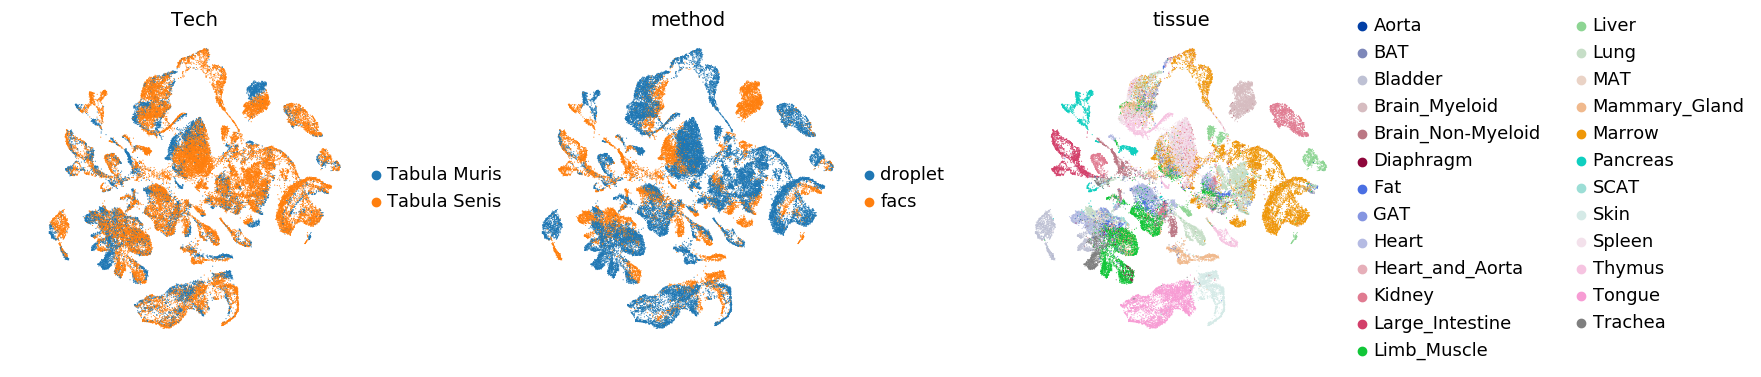

In [25]:
sc.pl.umap(latent_adata, color=['Tech', 'method', 'tissue'], wspace=0.4, frameon=False)

In [30]:
studies = list(new_network.condition_encoder.keys())
vectors = new_network.encoder_model.get_weights()[0]

In [38]:
studies[-1] = studies[-1] + '(query)'
studies[-2] = studies[-2] + '(query)'

In [31]:
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt

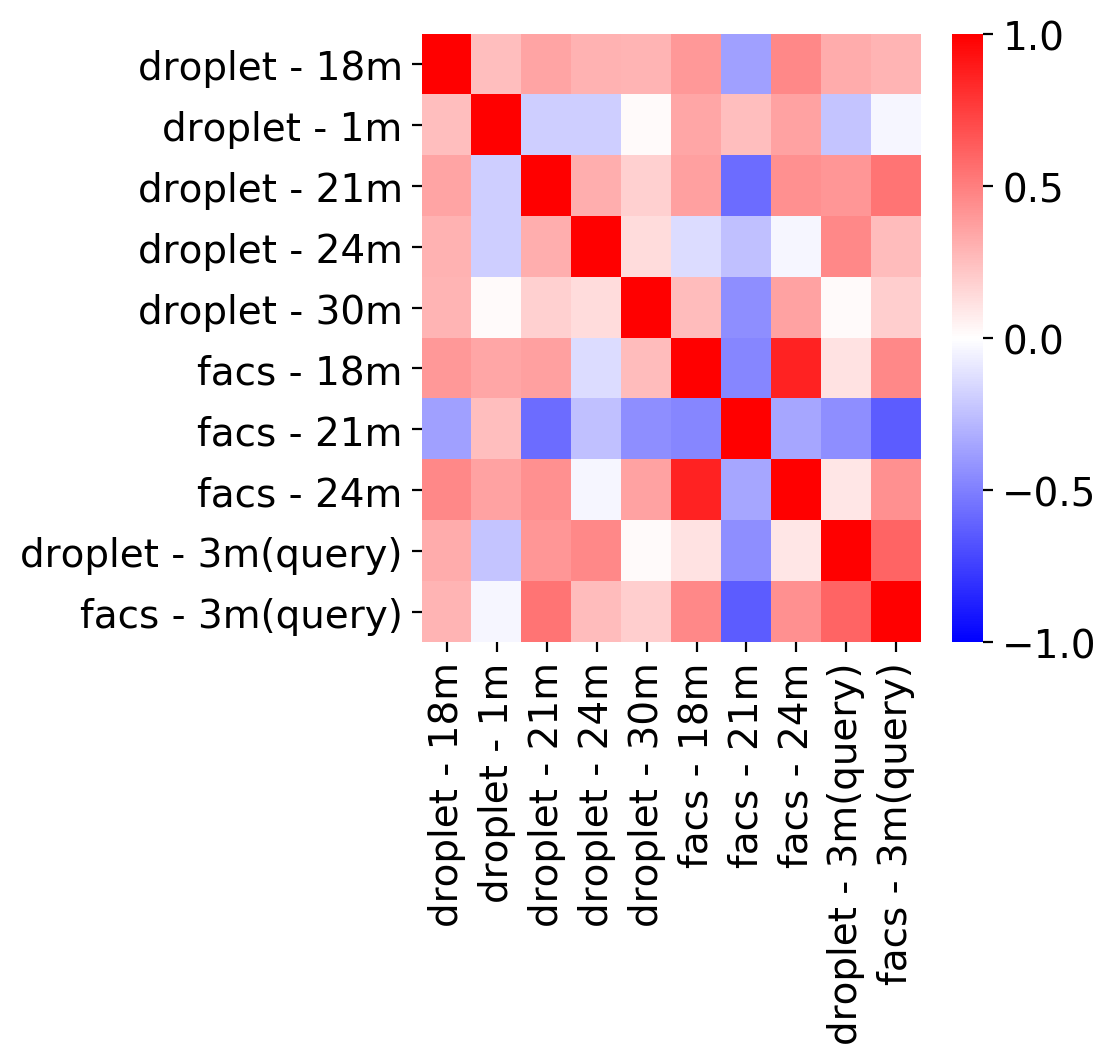

In [39]:
plt.figure(dpi=100)
sns.heatmap(cosine_similarity(vectors), vmin=-1.0, vmax=1.0, cmap="bwr",
            xticklabels=studies, yticklabels=studies)

In [51]:
sc.pp.subsample(latent_adata, fraction=1.0, random_state=100) # shuffle latent adata for visualization purpose

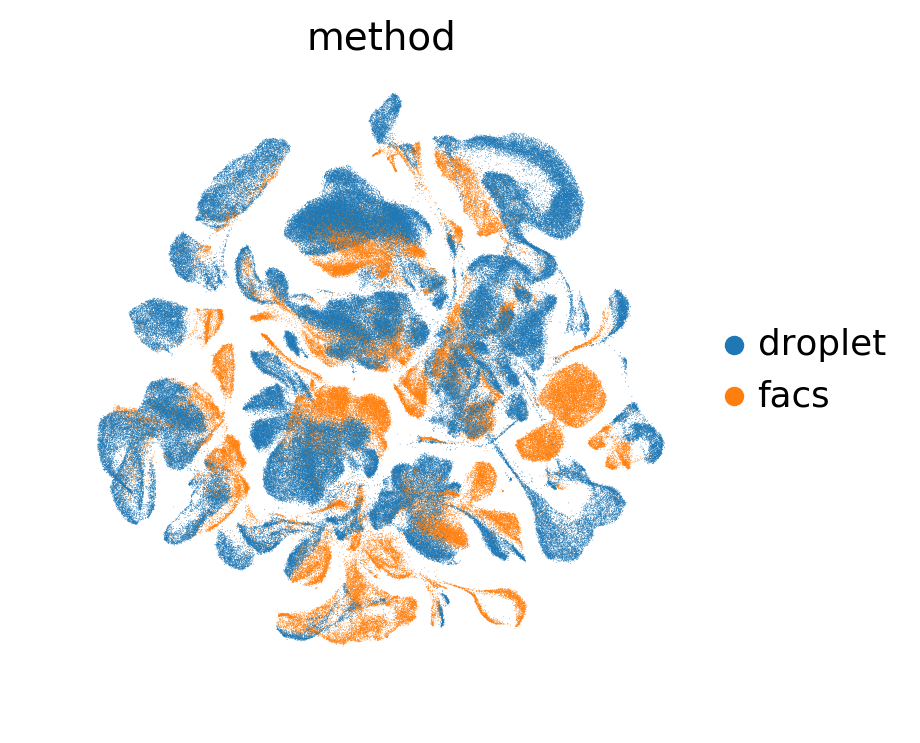

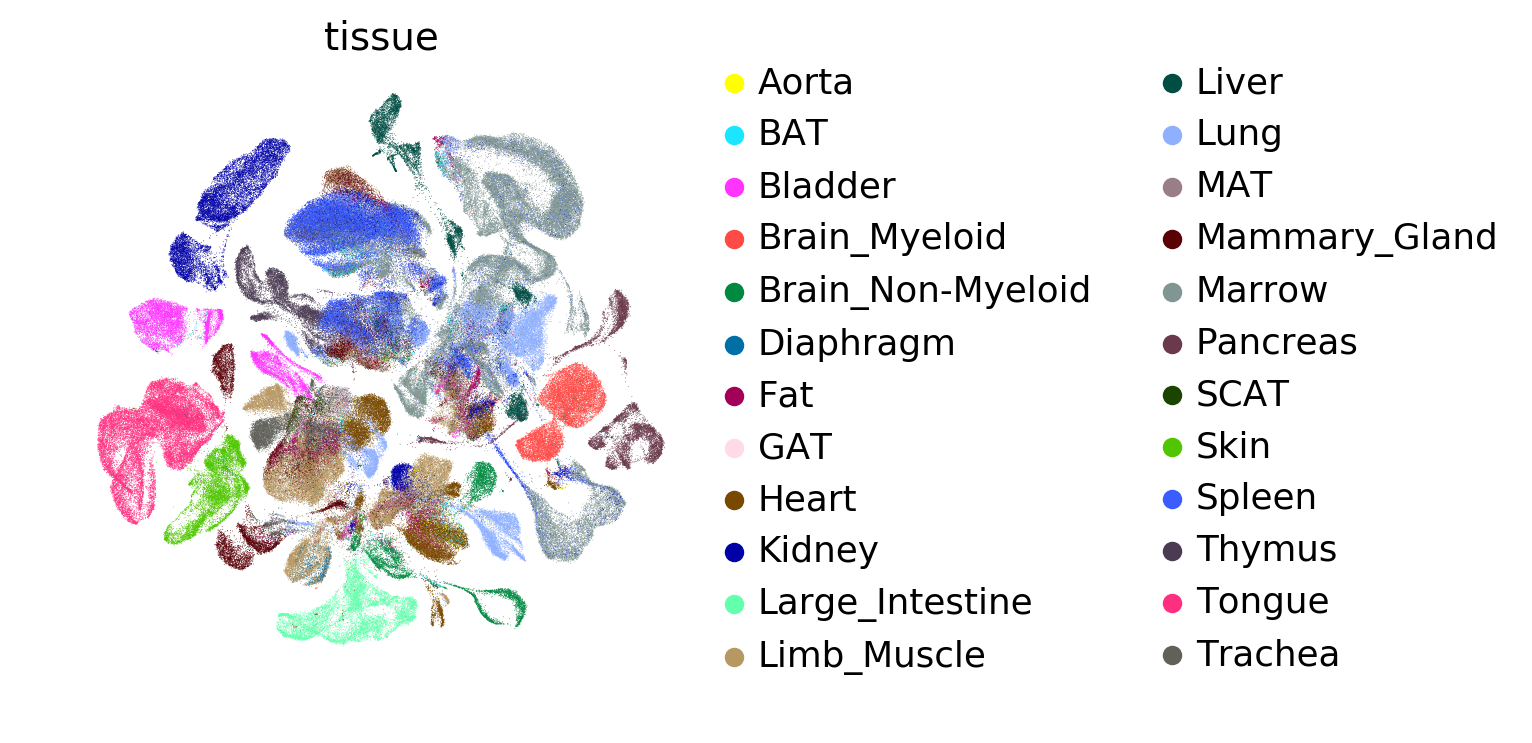

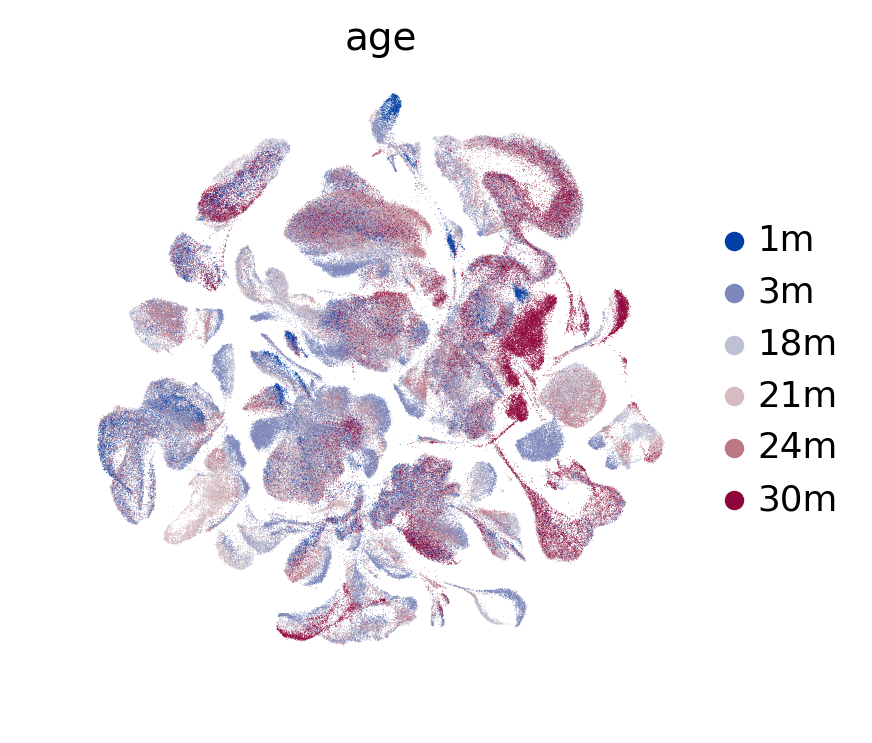

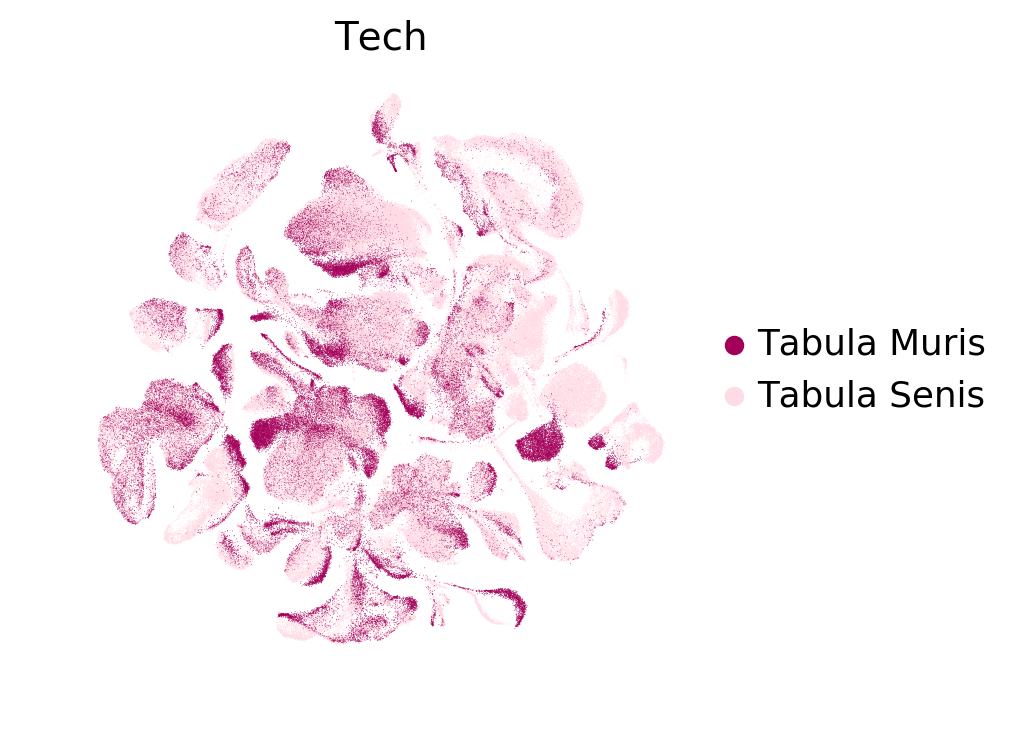

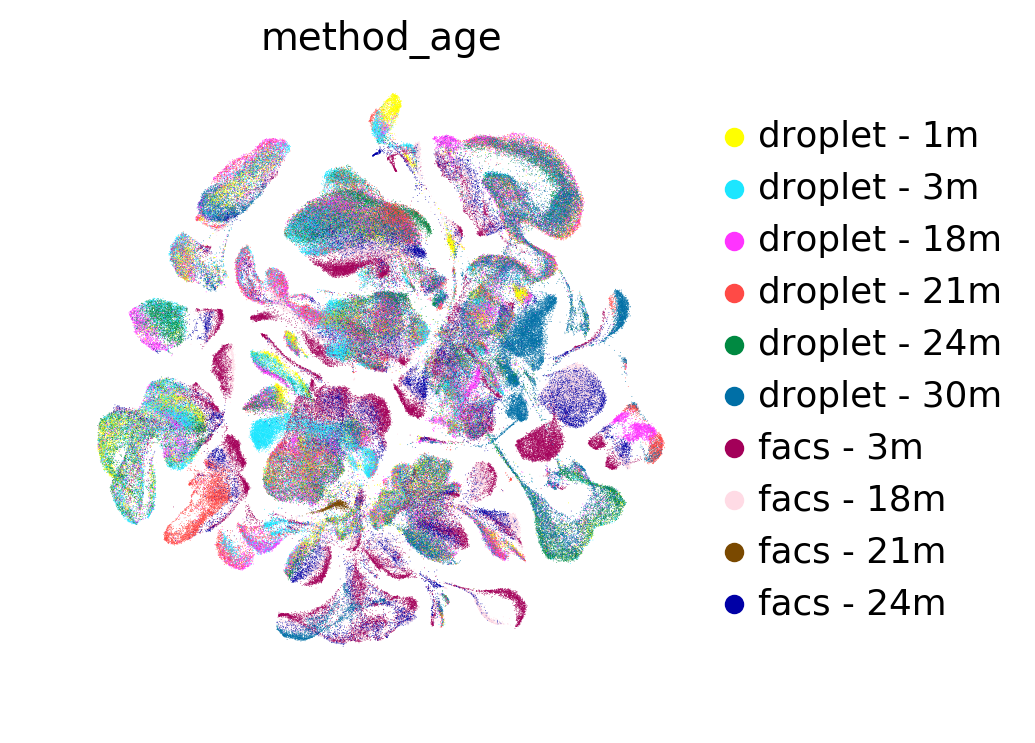

In [52]:
sc.pl.umap(latent_adata, color='method', frameon=False, save='_after_surgery_senis+muris_method.pdf')
sc.pl.umap(latent_adata, color='tissue', frameon=False, save='_after_surgery_senis+muris_tissue.pdf', palette=sc.pl.palettes.godsnot_102)
sc.pl.umap(latent_adata, color='age', frameon=False, save='_after_surgery_senis+muris_age.pdf', palette=sc.pl.palettes.zeileis_28)
sc.pl.umap(latent_adata, color='Tech', frameon=False, save='_after_surgery_senis+muris_Tech.pdf', palette=sc.pl.palettes.godsnot_102[6:])
sc.pl.umap(latent_adata, color=condition_key, frameon=False, save=f'_after_surgery_senis+muris_{condition_key}.pdf', palette=sc.pl.palettes.godsnot_102)

In [47]:
latent_adata.write_h5ad(os.path.join(base_path, 'tabula_senis_muris/latents/all.h5ad'))

In [49]:
latent_adata = sc.read(os.path.join(base_path, 'tabula_senis_muris/latents/all.h5ad'))

In [50]:
latent_adata

AnnData object with n_obs × n_vars = 354407 × 32 
    obs: 'FACS.selection', 'Tech', 'age', 'batch', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'method_age', 'method_tissue', 'mouse.id', 'n_counts', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation'
    uns: 'Tech_colors', 'age_colors', 'method_age_colors', 'method_colors', 'neighbors', 'tissue_colors', 'umap'
    obsm: 'X_umap'

# Weighted KNN

### 1. Compute Latents for Tabula Senis and Muris

In [18]:
train_latent = latent_adata[latent_adata.obs['Tech'] == 'Tabula Senis']
train_latent

View of AnnData object with n_obs × n_vars = 264287 × 32 
    obs: 'FACS.selection', 'Tech', 'age', 'batch', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'method_age', 'method_tissue', 'mouse.id', 'n_counts', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation'
    uns: 'Tech_colors', 'age_colors', 'method_age_colors', 'method_colors', 'neighbors', 'tissue_colors', 'umap'
    obsm: 'X_umap'

In [19]:
valid_latent = latent_adata[latent_adata.obs['Tech'] == 'Tabula Muris']
valid_latent

View of AnnData object with n_obs × n_vars = 90120 × 32 
    obs: 'FACS.selection', 'Tech', 'age', 'batch', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'method_age', 'method_tissue', 'mouse.id', 'n_counts', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation'
    uns: 'Tech_colors', 'age_colors', 'method_age_colors', 'method_colors', 'neighbors', 'tissue_colors', 'umap'
    obsm: 'X_umap'

In [53]:
valid_latent.obs['Tech'].value_count

10X_P4_0_AAACCTGAGATTACCC-1-0-1    Tabula Muris
10X_P4_0_AAACCTGAGTGCCAGA-1-0-1    Tabula Muris
10X_P4_0_AAACCTGCAAATCCGT-1-0-1    Tabula Muris
10X_P4_0_AAACCTGGTAATCGTC-1-0-1    Tabula Muris
10X_P4_0_AAACCTGGTCCAACTA-1-0-1    Tabula Muris
                                       ...     
P9.MAA001887.3_39_F.1.1-1-1-1-1    Tabula Muris
P9.MAA001888.3_39_F.1.1-1-1-1-1    Tabula Muris
P9.MAA001889.3_38_F.1.1-1-1-1-1    Tabula Muris
P9.MAA001892.3_38_F.1.1-1-1-1-1    Tabula Muris
P9.MAA001894.3_39_F.1.1-1-1-1-1    Tabula Muris
Name: Tech, Length: 90120, dtype: category
Categories (1, object): [Tabula Muris]

In [20]:
tissues = valid_latent.obs['tissue'].unique().tolist()

# KNN Training

In [13]:
n_neighbor = 400
threshold = 0.5

# Cell type prediction

In [ ]:
sca.ann.weighted_knn(train_latent, 
                     valid_latent, 
                     cell_type_key, 
                     n_neighbors=20, 
                     threshold=0.5, 
                     pred_unknown=True, 
                     )

In [31]:
# true_labels = np.array(valid_latent.obs[cell_type_key].values).reshape(-1, 1)
# 
# labels_eval = pred_labels == true_labels
# labels_eval = labels_eval.astype(object)
# 
# n_correct = len(labels_eval[labels_eval == True])
# n_incorrect = len(labels_eval[labels_eval == False]) - len(labels_eval[pred_labels == 'Unknown'])
# n_unknown = len(labels_eval[pred_labels == 'Unknown'])
# 
# labels_eval[labels_eval == True] = f'Correct ({n_correct})'
# labels_eval[labels_eval == False] = f'InCorrect ({n_incorrect})'
# labels_eval[pred_labels == 'Unknown'] = f'Unknown ({n_unknown})'
# 
# labels_eval_key = f'celltype_evaluation_w_unknown_20_0.5'
# uncertainty_key = f'celltype_uncertainty_w_unknown_20_0.5'
# pred_labels_key = f'predicted_celltype_w_unknown_20_0.5'
# 
# valid_latent.obs[labels_eval_key] = pd.Categorical(labels_eval.reshape(-1, ))
# valid_latent.obs[uncertainty_key] = uncertainties
# valid_latent.obs[pred_labels_key] = pd.Categorical(pred_labels.reshape(-1, ))

In [ ]:
# pred_labels, uncertainties = sn.utils.weighted_knn(train_latent, 
#                                                    valid_latent, 
#                                                    'tissue', 
#                                                    n_neighbors=n_neighbor, 
#                                                    threshold=threshold, 
#                                                    pred_unknown=True, 
#                                                    return_uncertainty=True,
#                                                    )

Weighted KNN with n_neighbors = 400 and threshold = 0.5 ... 

In [ ]:
# true_labels = np.array(valid_latent.obs['tissue'].values).reshape(-1, 1)
# 
# labels_eval = pred_labels == true_labels
# labels_eval = labels_eval.astype(object)
# 
# n_correct = len(labels_eval[labels_eval == True])
# n_incorrect = len(labels_eval[labels_eval == False]) - len(labels_eval[pred_labels == 'Unknown'])
# n_unknown = len(labels_eval[pred_labels == 'Unknown'])
# 
# labels_eval[labels_eval == True] = f'Correct'
# labels_eval[labels_eval == False] = f'InCorrect'
# labels_eval[pred_labels == 'Unknown'] = f'Unknown'
# 
# labels_eval_key = f'tissue_evaluation_w_unknown_{n_neighbor}_{threshold}'
# uncertainty_key = f'tissue_uncertainty_w_unknown_{n_neighbor}_{threshold}'
# pred_labels_key = f'predicted_tissue_w_unknown_{n_neighbor}_{threshold}'
# 
# valid_latent.obs[labels_eval_key] = pd.Categorical(labels_eval.reshape(-1, ))
# valid_latent.obs[uncertainty_key] = uncertainties
# valid_latent.obs[pred_labels_key] = pd.Categorical(pred_labels.reshape(-1, ))

In [33]:
valid_latent.write_h5ad(os.path.join(base_path, 'tabula_senis_muris/latents/muris_with_knn.h5ad'))

In [8]:
# valid_latent = sc.read(os.path.join(base_path, 'tabula_senis_muris/latents/muris_with_knn.h5ad'))

In [9]:
sc.settings.figdir = "./results/classification/tabula_senis_muris/umaps+violins/"
sc.set_figure_params(dpi=100)

# Celltype uncertainty Box plot for Trachea and other tissues

In [29]:
labels_key = f'celltype_evaluation_w_unknown_20_0.5'
uncertainty_key = f'celltype_uncertainty_w_unknown_20_0.5'

In [34]:
uncertainties = valid_latent.obs[uncertainty_key].values
tissues = valid_latent.obs['tissue'].values
evals = valid_latent.obs[labels_key].apply(lambda x: x.split(" (")[0])

In [35]:
box_plot_df = pd.DataFrame({"Tissue": tissues, "uncertainty": uncertainties, 'eval': evals})
box_plot_df['tissue'] = 'others'
box_plot_df.loc[box_plot_df['Tissue'] == 'Trachea', 'tissue'] = 'Trachea'
box_plot_df.head()

Tissue   uncertainty     eval  tissue
10X_P4_0_AAACCTGAGATTACCC-1-0-1  Tongue  1.000800e-01  Correct  others
10X_P4_0_AAACCTGAGTGCCAGA-1-0-1  Tongue  5.960464e-08  Correct  others
10X_P4_0_AAACCTGCAAATCCGT-1-0-1  Tongue  0.000000e+00  Correct  others
10X_P4_0_AAACCTGGTAATCGTC-1-0-1  Tongue  4.991174e-02  Correct  others
10X_P4_0_AAACCTGGTCCAACTA-1-0-1  Tongue  4.001082e-01  Correct  others

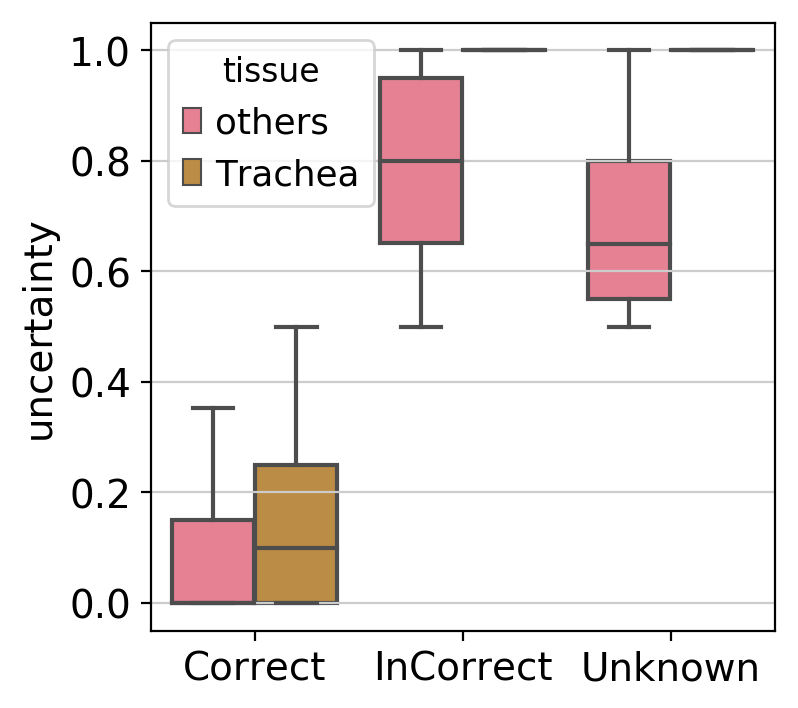

In [40]:
ax = sns.boxplot(x="eval", y='uncertainty', hue="tissue", data=box_plot_df, 
                 showfliers = False, palette=sns.color_palette('husl', 8))
plt.xlabel("")
plt.savefig("./results/classification/tabula_senis_muris/boxplot_celltype.pdf", dpi=200)

# Plot Correct/Incorrect UMAP + Uncertainties UMAP

In [41]:
n_neighbor, threshold = 20, 0.5

In [43]:
sc.set_figure_params(dpi=100)

In [45]:
labels_key = f'celltype_evaluation_w_unknown_{n_neighbor}_{threshold}'
uncertainty_key = f'celltype_uncertainty_w_unknown_{n_neighbor}_{threshold}'

sc.pl.umap(valid_latent, color=labels_key, save=f'_celltype_eval_muris_with_unknown_{n_neighbor}_{threshold}.pdf',
   frameon=False, title='', show=False, palette=sc.pl.palettes.godsnot_102)

sc.pl.umap(valid_latent, color=uncertainty_key, save=f'_celltype_uncertainty_muris_with_unknown_{n_neighbor}_{threshold}.pdf',
           frameon=False, title='', show=False)

sc.pl.umap(valid_latent, color='tissue', save='_tissue_muris.pdf',
           frameon=False, title='', show=False, palette=sc.pl.palettes.godsnot_102)

sc.pl.violin(valid_latent, groupby=labels_key, keys=uncertainty_key, show=False,
             rotation=45, jitter=False, save=f'_celltype_uncertainty_w_unknown_{n_neighbor}_{threshold}.pdf')

In [173]:
sns.set(style='whitegrid')

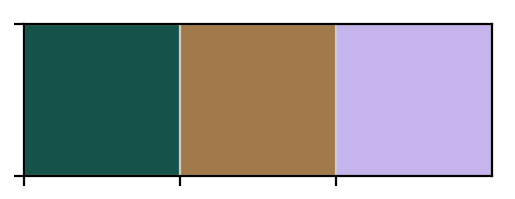

In [39]:
color_palette = sns.color_palette("cubehelix", 3)
sns.palplot(sns.color_palette("cubehelix", 3))

In [11]:
tissues = valid_latent.obs['tissue'].unique().tolist()

In [16]:
results_df = pd.DataFrame(columns=['tissue', 'k', 'prob', 'Correct', 'InCorrect', 'Unknown'])
for tissue in tissues:
    labels_eval_key = f'predicted_tissue_w_unknown_{n_neighbor}_{threshold}'

    tissue_latent = valid_latent[valid_latent.obs['tissue'] == tissue]

    pred_labels = tissue_latent.obs[labels_eval_key].values
    true_labels = tissue_latent.obs['tissue'].values

    labels_eval = np.array(pred_labels) == np.array(true_labels)

    n_correct = len(labels_eval[labels_eval == True])
    n_incorrect = len(labels_eval[labels_eval == False]) - len(labels_eval[pred_labels == 'Unknown'])
    n_unknown = len(labels_eval[pred_labels == 'Unknown'])
    
    new_row = {"tissue": f"{tissue} ({tissue_latent.shape[0]})", "k": n_neighbor, "prob": threshold}

    new_row['Correct'] = n_correct
    new_row['InCorrect'] = n_incorrect
    new_row['Unknown'] = n_unknown

    results_df = results_df.append(new_row, ignore_index=True)

In [25]:
celltype_results_df = pd.DataFrame(columns=['tissue', 'k', 'prob', 'Correct', 'InCorrect', 'Unknown'])
for tissue in tissues:
    labels_eval_key = f'predicted_celltype_w_unknown_20_0.5'

    tissue_latent = valid_latent[valid_latent.obs['tissue'] == tissue]

    pred_labels = tissue_latent.obs[labels_eval_key].values
    true_labels = tissue_latent.obs[cell_type_key].values

    labels_eval = np.array(pred_labels) == np.array(true_labels)

    n_correct = len(labels_eval[labels_eval == True])
    n_incorrect = len(labels_eval[labels_eval == False]) - len(labels_eval[pred_labels == 'Unknown'])
    n_unknown = len(labels_eval[pred_labels == 'Unknown'])
    
    new_row = {"tissue": f"{tissue} ({tissue_latent.shape[0]})", "k": n_neighbor, "prob": threshold}

    new_row['Correct'] = n_correct
    new_row['InCorrect'] = n_incorrect
    new_row['Unknown'] = n_unknown

    celltype_results_df = celltype_results_df.append(new_row, ignore_index=True)

In [29]:
celltype_results_df.loc[celltype_results_df['tissue'].str.startswith('Trachea'), 'Correct'].sum()

799

In [47]:
celltype_results_df.loc[celltype_results_df['tissue'].str.startswith('Trachea'), 'InCorrect'].sum()

6207

In [31]:
celltype_results_df.loc[celltype_results_df['tissue'].str.startswith('Trachea'), 'Unknown'].sum()

2324

In [33]:
celltype_results_df.loc[~celltype_results_df['tissue'].str.startswith('Trachea'), 'Correct'].sum()

67300

In [37]:
celltype_results_df.loc[~celltype_results_df['tissue'].str.startswith('Trachea'), 'InCorrect'].sum()

8093

In [36]:
celltype_results_df.loc[~celltype_results_df['tissue'].str.startswith('Trachea'), 'Unknown'].sum()

5397

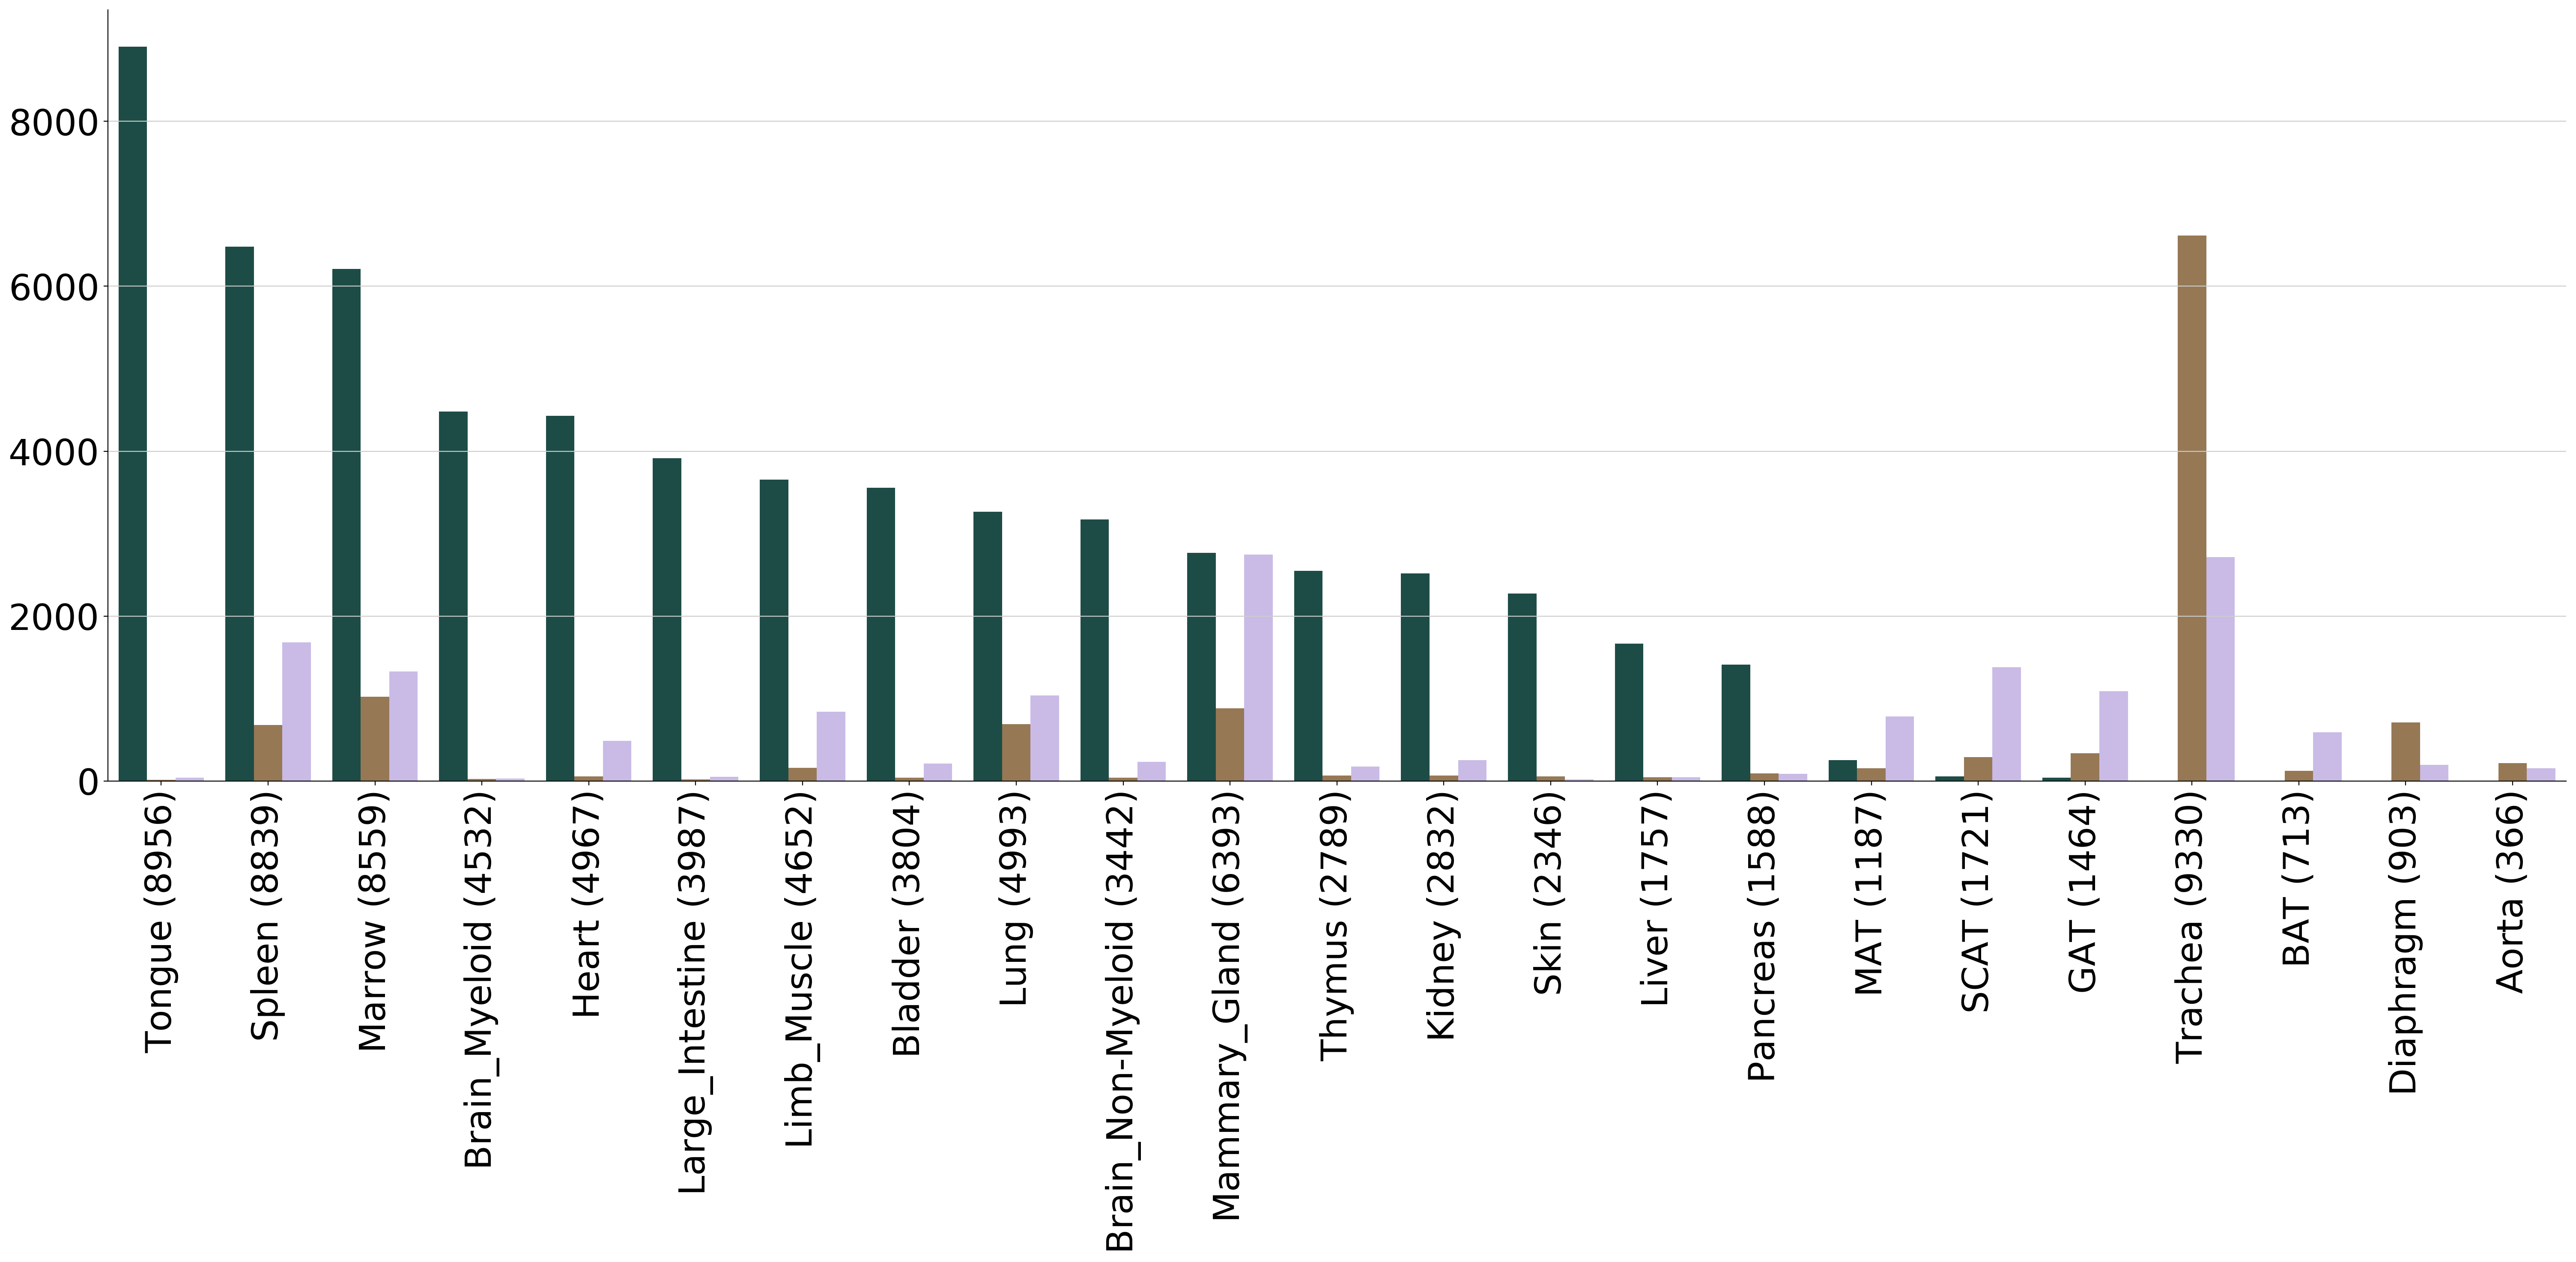

In [40]:
results_df = results_df.sort_values('Correct', ascending=False)
results_df_melted = pd.melt(results_df, id_vars=['k', 'prob', 'tissue'], var_name='type', value_name='n_samples')
barplot = sns.catplot(x='tissue', y='n_samples', hue='type', data=results_df_melted, 
                      kind='bar', height=10, aspect=3, legend=False, palette=color_palette)


plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel("")
plt.xlabel("")
plt.savefig(f"./results/classification/tabula_senis_muris/barplot_tissues_classification.pdf", bbox_inches='tight')
# results_df.to_csv("./results/classification/tabula_senis_muris/table_tissues.csv", index=None)
plt.show()
plt.close()

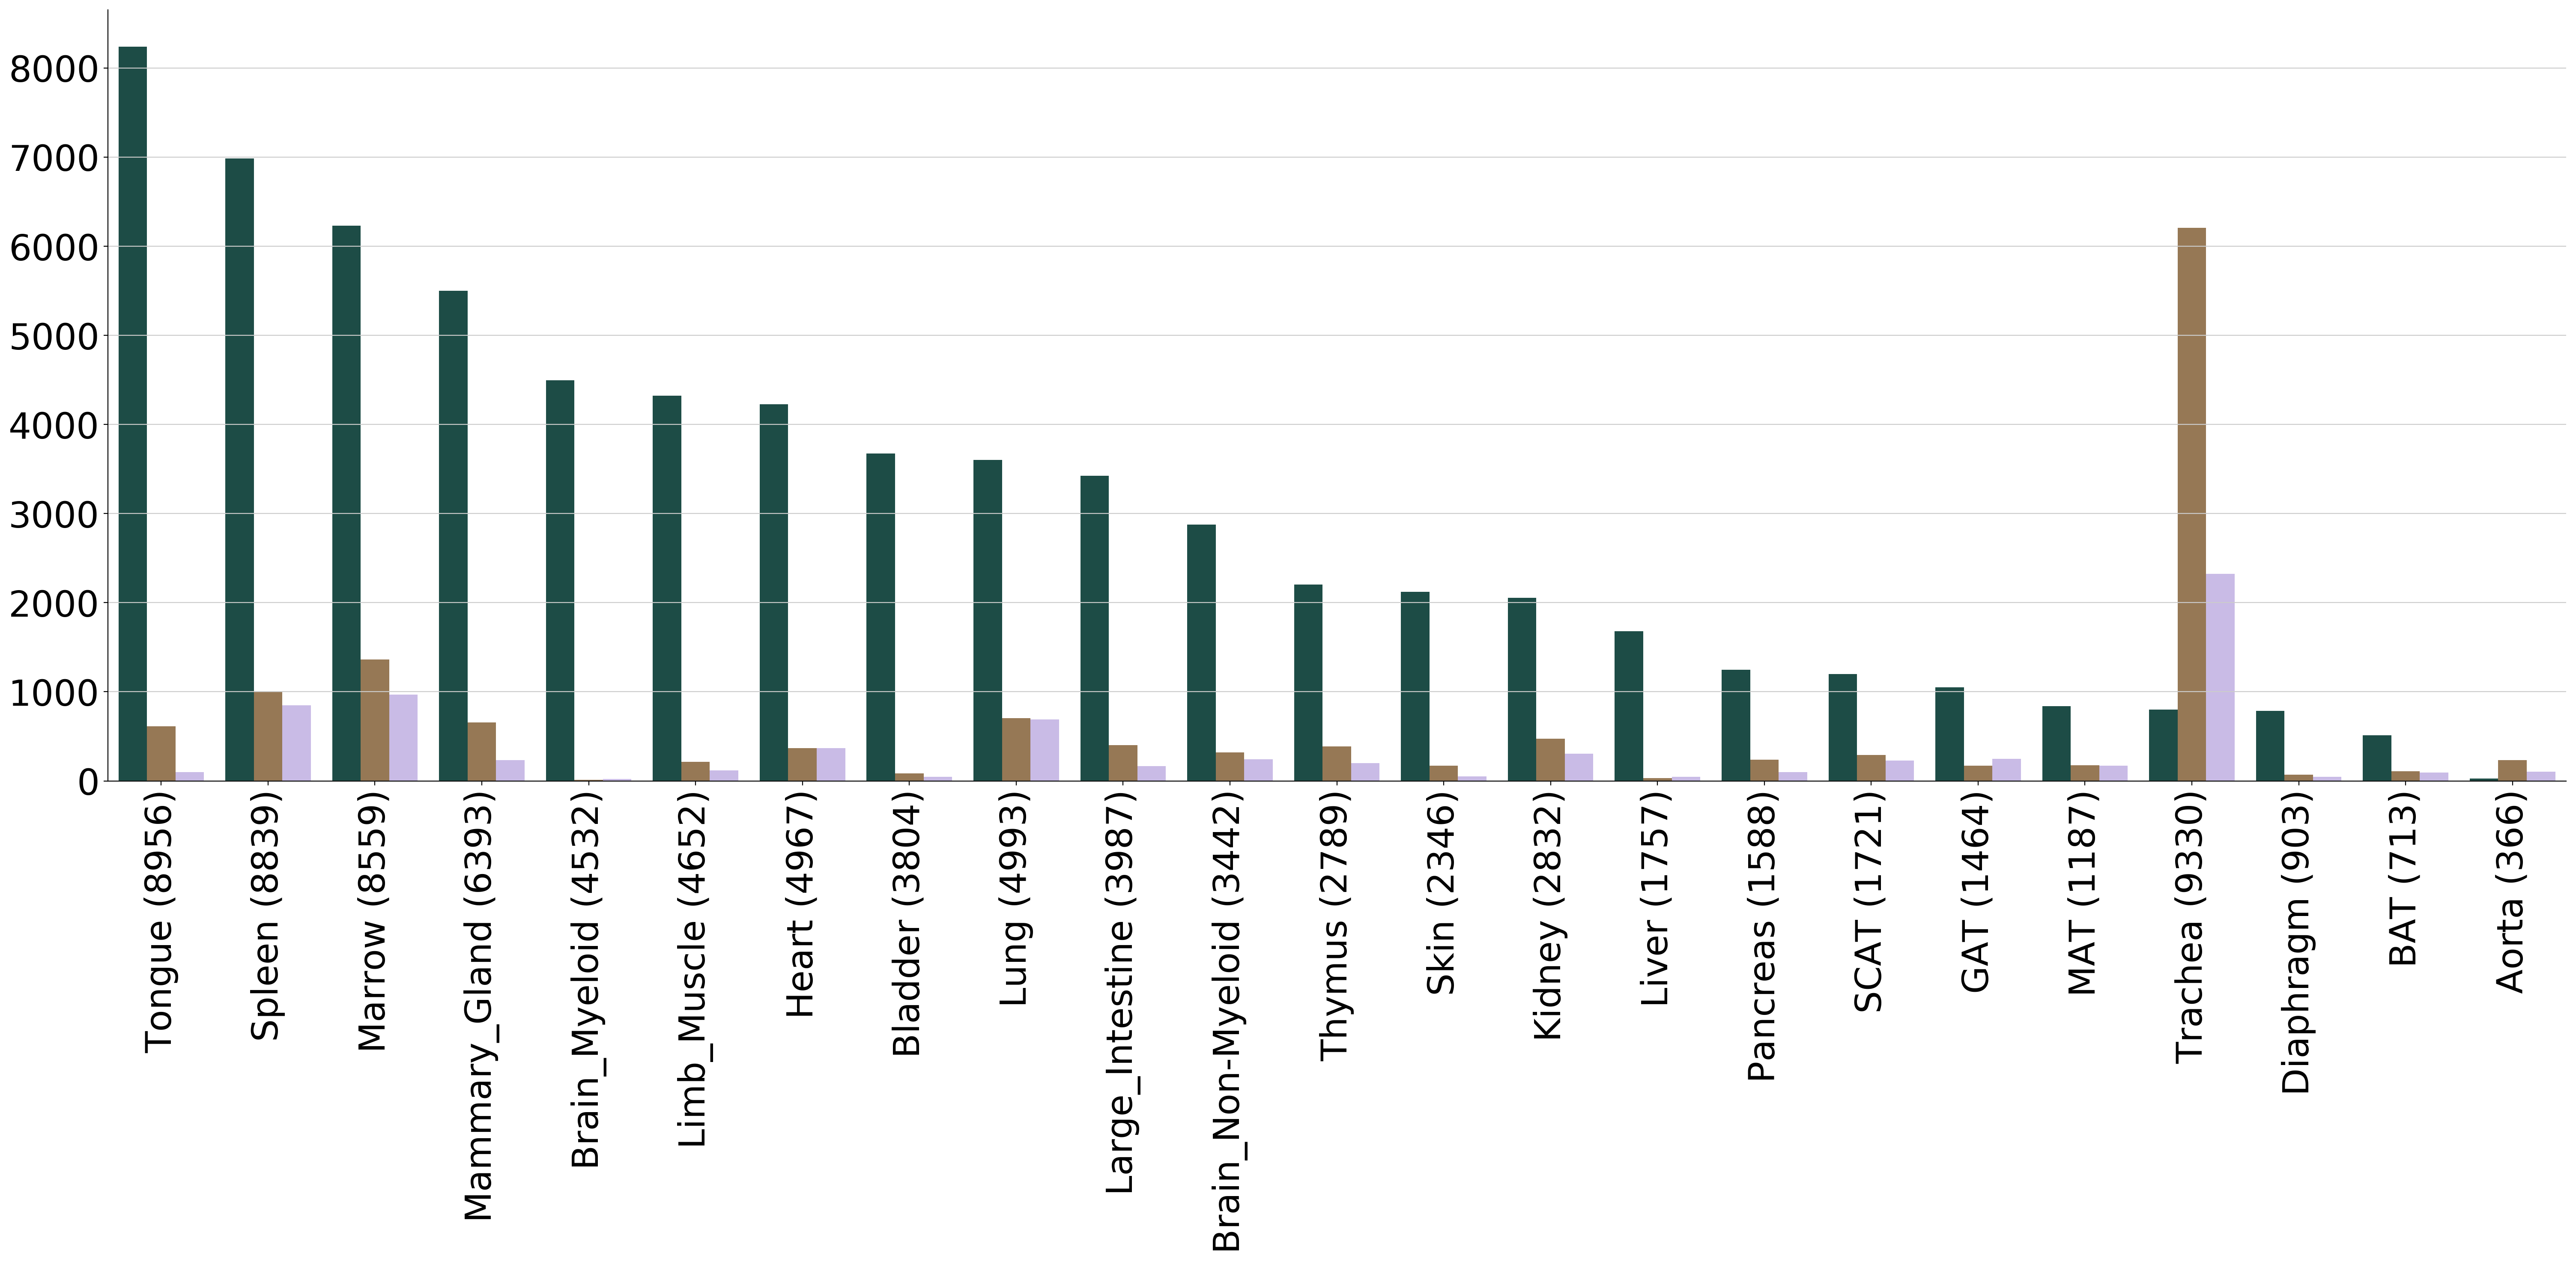

In [46]:
celltype_results_df = celltype_results_df.sort_values('Correct', ascending=False)
results_df_melted = pd.melt(celltype_results_df, id_vars=['k', 'prob', 'tissue'], var_name='type', value_name='n_samples')
barplot = sns.catplot(x='tissue', y='n_samples', hue='type', data=results_df_melted, 
                      kind='bar', height=10, aspect=3, legend=False, palette=color_palette)


plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel("")
plt.xlabel("")
plt.savefig(f"./results/classification/tabula_senis_muris/barplot_celltype_classification.pdf", bbox_inches='tight')
# results_df.to_csv("./results/classification/tabula_senis_muris/table_tissues.csv", index=None)
plt.show()
plt.close()

## Generate Sankey plots per tissue

In [13]:
# valid_latent = sc.read("./results/classification/tabula_senis_muris/valid_latent.h5ad")
# valid_latent

AnnData object with n_obs × n_vars = 90120 × 32 
    obs: 'FACS.selection', 'age', 'batch', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'method_age', 'method_tissue', 'mouse.id', 'n_counts', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation', 'Tech', 'labels_evaluation_w_unknown_20_0.5', 'uncertainty_w_unknown_20_0.5', 'predicted_labels_w_unknown_20_0.5'

In [97]:
tissues = valid_latent.obs['tissue'].unique().tolist()

In [ ]:
for tissue in tissues:
    print(f'{tissue}...', end='')
    labels_eval_key = f'predicted_labels_w_unknown_{n_neighbor}_{threshold}'
    
    tissue_latent = valid_latent[valid_latent.obs['tissue'] == tissue]
    cell_type_dict = tissue_latent.obs[cell_type_key].value_counts().to_dict()
    labels_eval_dict = tissue_latent.obs[labels_eval_key].value_counts().to_dict()
    
    tissue_latent.obs[cell_type_key] = tissue_latent.obs[cell_type_key].apply(lambda x: f'{x} ({cell_type_dict[x]})')
    tissue_latent.obs[labels_eval_key] = tissue_latent.obs[labels_eval_key].apply(lambda x: f'{x} ({labels_eval_dict[x]})')
    
    pred_labels = tissue_latent.obs[labels_eval_key].values
    true_labels = tissue_latent.obs[cell_type_key].values
    
    pred_labels = np.array(pred_labels).reshape(-1, 1)
    true_labels = np.array(true_labels).reshape(-1, 1)
    
    
        
    plot_data = np.concatenate([true_labels, pred_labels], axis=1)
    
    sn.pl.sankey_diagram(plot_data, v_gap_frac=0.1, h_gap_frac=0.03, figsize=(35, 21), x_range=(5, 20),
                              color_side=1, wdisp_sep=' ', labels=('', ''), disp_width=False,
                              cmap=matplotlib.cm.get_cmap('jet'),
                              save_path=f"./results/classification/tabula_senis_muris/sankey/sankey_{tissue}.pdf",
                              show=False,
                             )
    print("finished!")